An autoencoder neural network is an unsupervised learning algorithm that applies backpropagation, setting the target values to be equal to the inputs. 

In [1]:
import pickle

In [2]:
datadir = '/data/MNIST/'

file = open(datadir + 'mnist.pkl', 'rb')

data = pickle.load(file,encoding='latin1')

(x_train,y_train), (x_valid, y_valid), (x_test, y_test) = data

# Autoencoder Model

In [3]:
from keras.layers import Input, Dense
from keras.models import Model

encoding_dim = 64  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

input_img = Input(shape=(784,))
encoded = Dense(encoding_dim, activation='sigmoid')(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='mse')

# autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')
autoencoder.summary()

/usr/lib/python3/dist-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_2 (Dense)              (None, 784)               50960     
Total params: 101,200
Trainable params: 101,200
Non-trainable params: 0
_________________________________________________________________


# Encoder Model


In [4]:
encoder = Model(input_img, encoded)
encoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                50240     
Total params: 50,240
Trainable params: 50,240
Non-trainable params: 0
_________________________________________________________________


# Decoder Model

In [5]:
encoded_input = Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
decoder = Model(encoded_input, decoder_layer(encoded_input))
decoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 784)               50960     
Total params: 50,960
Trainable params: 50,960
Non-trainable params: 0
_________________________________________________________________


# Training

In [6]:
from keras.callbacks import EarlyStopping

autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test)
               )

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 1s - loss: 0.0817 - val_loss: 0.0675
Epoch 2/50
50000/50000 [==============================] - 1s - loss: 0.0662 - val_loss: 0.0641
Epoch 3/50
50000/50000 [==============================] - 1s - loss: 0.0604 - val_loss: 0.0564
Epoch 4/50
50000/50000 [==============================] - 1s - loss: 0.0534 - val_loss: 0.0500
Epoch 5/50
50000/50000 [==============================] - 1s - loss: 0.0477 - val_loss: 0.0450
Epoch 6/50
50000/50000 [==============================] - 1s - loss: 0.0432 - val_loss: 0.0409
Epoch 7/50
50000/50000 [==============================] - 1s - loss: 0.0396 - val_loss: 0.0376
Epoch 8/50
50000/50000 [==============================] - 1s - loss: 0.0365 - val_loss: 0.0346
Epoch 9/50
50000/50000 [==============================] - 1s - loss: 0.0336 - val_loss: 0.0319
Epoch 10/50
50000/50000 [==============================] - 1s - loss: 0.0311 - val_loss: 0.0296

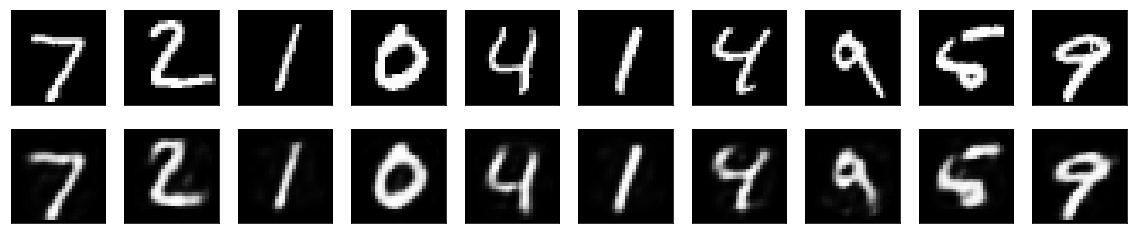

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

def plotImages(x_test, decoded_imgs):
    n = 10
    plt.figure(figsize=(20, 4))
    for i in range(n):

        ax = plt.subplot(2, n, i + 1)
        plt.imshow(x_test[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)


        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(decoded_imgs[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()

encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)   
plotImages(x_test, decoded_imgs)

# Sparse model

In [8]:
from keras import regularizers
from keras import optimizers

encoding_dim = 64

input_img = Input(shape=(784,))
# add a Dense layer with a L1 activity regularizer
encoded = Dense(encoding_dim, activation='sigmoid',
                activity_regularizer=regularizers.l1(10e-6))(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)

autoencoder = Model(input_img, decoded)

# opt = optimizers.adam(lr=0.00001)
# autoencoder.compile(optimizer=opt, loss='binary_crossentropy')
autoencoder.compile(optimizer='adam', loss='mse')

autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_4 (Dense)              (None, 784)               50960     
Total params: 101,200
Trainable params: 101,200
Non-trainable params: 0
_________________________________________________________________


In [9]:
earlystop = EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=2,
                              verbose=0, mode='auto')

autoencoder.fit(x_train, x_train,
                epochs=200,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test),
#                  callbacks = [earlystop]
               )

Train on 50000 samples, validate on 10000 samples
Epoch 1/200
50000/50000 [==============================] - 1s - loss: 0.1514 - val_loss: 0.1058
Epoch 2/200
50000/50000 [==============================] - 1s - loss: 0.0953 - val_loss: 0.0870
Epoch 3/200
50000/50000 [==============================] - 1s - loss: 0.0814 - val_loss: 0.0760
Epoch 4/200
50000/50000 [==============================] - 1s - loss: 0.0725 - val_loss: 0.0688
Epoch 5/200
50000/50000 [==============================] - 1s - loss: 0.0664 - val_loss: 0.0637
Epoch 6/200
50000/50000 [==============================] - 1s - loss: 0.0621 - val_loss: 0.0599
Epoch 7/200
50000/50000 [==============================] - 1s - loss: 0.0586 - val_loss: 0.0568
Epoch 8/200
50000/50000 [==============================] - 1s - loss: 0.0558 - val_loss: 0.0543
Epoch 9/200
50000/50000 [==============================] - 1s - loss: 0.0536 - val_loss: 0.0522
Epoch 10/200
50000/50000 [==============================] - 1s - loss: 0.0514 - val_lo

50000/50000 [==============================] - 1s - loss: 0.0286 - val_loss: 0.0283
Epoch 86/200
50000/50000 [==============================] - 1s - loss: 0.0286 - val_loss: 0.0282
Epoch 87/200
50000/50000 [==============================] - 1s - loss: 0.0285 - val_loss: 0.0282
Epoch 88/200
50000/50000 [==============================] - 1s - loss: 0.0284 - val_loss: 0.0281
Epoch 89/200
50000/50000 [==============================] - 1s - loss: 0.0284 - val_loss: 0.0280
Epoch 90/200
50000/50000 [==============================] - 1s - loss: 0.0283 - val_loss: 0.0280
Epoch 91/200
50000/50000 [==============================] - 1s - loss: 0.0283 - val_loss: 0.0279
Epoch 92/200
50000/50000 [==============================] - 1s - loss: 0.0282 - val_loss: 0.0279
Epoch 93/200
50000/50000 [==============================] - 1s - loss: 0.0281 - val_loss: 0.0278
Epoch 94/200
50000/50000 [==============================] - 1s - loss: 0.0281 - val_loss: 0.0278
Epoch 95/200
50000/50000 [=================

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                50240     
Total params: 50,240
Trainable params: 50,240
Non-trainable params: 0
_________________________________________________________________
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 64)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 784)               50960     
Total params: 50,960
Trainable params: 50,960
Non-trainable params: 0
_________________________________________________________________


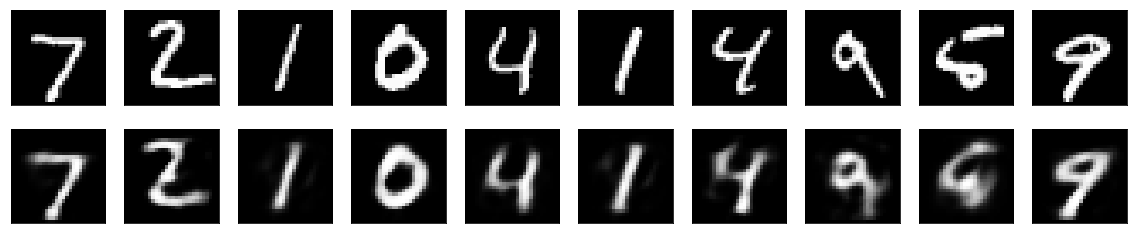

In [10]:
encoder = Model(input_img, encoded)
encoder.summary()

encoded_input = Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
decoder = Model(encoded_input, decoder_layer(encoded_input))
decoder.summary()

encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

plotImages(x_test, decoded_imgs)

# Deep autoencoder

In [11]:
input_img = Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)

decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='mse')

autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 2s - loss: 0.0663 - val_loss: 0.0405
Epoch 2/100
50000/50000 [==============================] - 1s - loss: 0.0342 - val_loss: 0.0288
Epoch 3/100
50000/50000 [==============================] - 1s - loss: 0.0261 - val_loss: 0.0229
Epoch 4/100
50000/50000 [==============================] - 1s - loss: 0.0220 - val_loss: 0.0202
Epoch 5/100
50000/50000 [==============================] - 1s - loss: 0.0196 - val_loss: 0.0183
Epoch 6/100
50000/50000 [==============================] - 1s - loss: 0.0181 - val_loss: 0.0170
Epoch 7/100
50000/50000 [==============================] - 1s - loss: 0.0170 - val_loss: 0.0163
Epoch 8/100
50000/50000 [==============================] - 1s - loss: 0.0162 - val_loss: 0.0154
Epoch 9/100
50000/50000 [==============================] - 1s - loss: 0.0155 - val_loss: 0.0151
Epoch 10/100
50000/50000 [==============================] - 1s - loss: 0.0149 - val_lo

50000/50000 [==============================] - 1s - loss: 0.0071 - val_loss: 0.0072
Epoch 86/100
50000/50000 [==============================] - 1s - loss: 0.0071 - val_loss: 0.0072
Epoch 87/100
50000/50000 [==============================] - 1s - loss: 0.0071 - val_loss: 0.0072
Epoch 88/100
50000/50000 [==============================] - 1s - loss: 0.0071 - val_loss: 0.0071
Epoch 89/100
50000/50000 [==============================] - 1s - loss: 0.0071 - val_loss: 0.0072
Epoch 90/100
50000/50000 [==============================] - 1s - loss: 0.0071 - val_loss: 0.0072
Epoch 91/100
50000/50000 [==============================] - 1s - loss: 0.0071 - val_loss: 0.0072
Epoch 92/100
50000/50000 [==============================] - 1s - loss: 0.0070 - val_loss: 0.0072
Epoch 93/100
50000/50000 [==============================] - 1s - loss: 0.0070 - val_loss: 0.0071
Epoch 94/100
50000/50000 [==============================] - 1s - loss: 0.0070 - val_loss: 0.0071
Epoch 95/100
50000/50000 [=================

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_6 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_7 (Dense)              (None, 32)                2080      
Total params: 110,816
Trainable params: 110,816
Non-trainable params: 0
_________________________________________________________________
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 32)                0         
_________________________________________________________________
dens

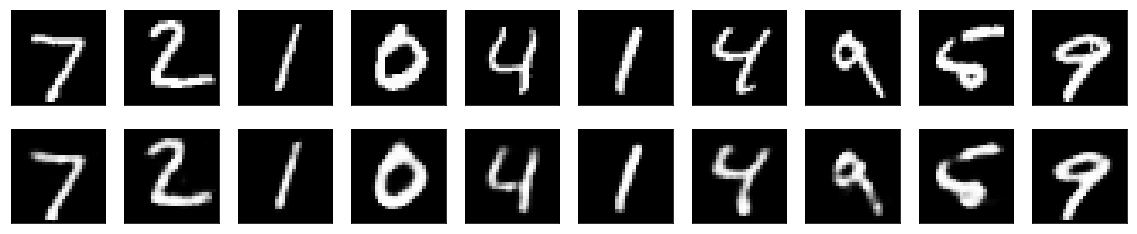

In [12]:
encoder = Model(input_img, encoded)
encoder.summary()

encoded_input = Input(shape=(32,))
decoded_out = autoencoder.layers[-3](encoded_input)
decoded_out = autoencoder.layers[-2](decoded_out)
decoded_out = autoencoder.layers[-1](decoded_out)

decoder = Model(encoded_input, decoded_out)
decoder.summary()

encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

plotImages(x_test, decoded_imgs)

# Convolutional autoencoder

In [13]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import backend as K

input_img = Input(shape=(28, 28, 1)) 

x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)


x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='relu', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='mse')

autoencoder.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 8)           584       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 8)           0         
__________

In [14]:
import numpy as np
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1)) 
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1)) 

autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test),
                )

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 30s - loss: 0.0382 - val_loss: 0.0249
Epoch 2/50
50000/50000 [==============================] - 30s - loss: 0.0222 - val_loss: 0.0199
Epoch 3/50
50000/50000 [==============================] - 30s - loss: 0.0189 - val_loss: 0.0177
Epoch 4/50
50000/50000 [==============================] - 30s - loss: 0.0173 - val_loss: 0.0164
Epoch 5/50
50000/50000 [==============================] - 30s - loss: 0.0162 - val_loss: 0.0156
Epoch 6/50
50000/50000 [==============================] - 30s - loss: 0.0154 - val_loss: 0.0148
Epoch 7/50
50000/50000 [==============================] - 30s - loss: 0.0148 - val_loss: 0.0146
Epoch 8/50
50000/50000 [==============================] - 30s - loss: 0.0144 - val_loss: 0.0140
Epoch 9/50
50000/50000 [==============================] - 31s - loss: 0.0140 - val_loss: 0.0137
Epoch 10/50
50000/50000 [==============================] - 30s - loss: 0.0136 - val_lo

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 8)           584       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 8)           0         
Total para

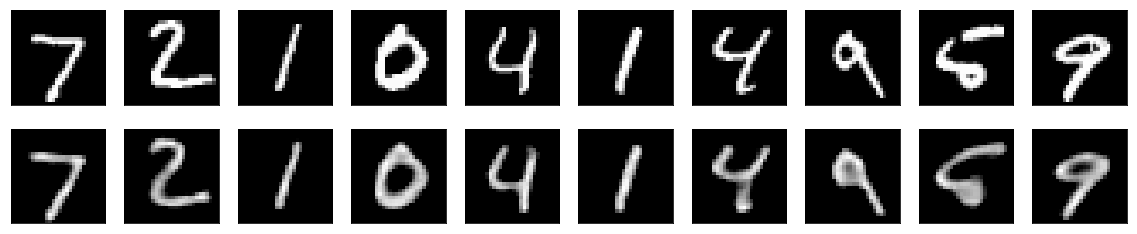

In [15]:

encoder = Model(input_img, encoded)
encoder.summary()

encoded_input = Input(shape=(4,4, 8)) 
decoded_out = autoencoder.layers[-7](encoded_input)
decoded_out = autoencoder.layers[-6](decoded_out)
decoded_out = autoencoder.layers[-5](decoded_out)
decoded_out = autoencoder.layers[-4](decoded_out)
decoded_out = autoencoder.layers[-3](decoded_out)
decoded_out = autoencoder.layers[-2](decoded_out)
decoded_out = autoencoder.layers[-1](decoded_out)

decoder = Model(encoded_input, decoded_out)
decoder.summary()


encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)/2 +0.5

plotImages(x_test, decoded_imgs)

# image denoising

In [16]:
import numpy as np
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

In [17]:
# Add more filters to do the denoise
input_img = Input(shape=(28, 28, 1))  

x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='relu', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='mse')

autoencoder.summary()
autoencoder.fit(x_train_noisy, x_train_noisy,
                epochs=100,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noisy, x_test_noisy)
               )

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 32)          9248      
_________________________________________________________________
up_sampling2d_1 (UpSampling2 (None, 14, 14, 32)        0         
__________

50000/50000 [==============================] - 64s - loss: 0.0307 - val_loss: 0.0308
Epoch 68/100
50000/50000 [==============================] - 65s - loss: 0.0307 - val_loss: 0.0307
Epoch 69/100
50000/50000 [==============================] - 69s - loss: 0.0306 - val_loss: 0.0305
Epoch 70/100
50000/50000 [==============================] - 66s - loss: 0.0306 - val_loss: 0.0305
Epoch 71/100
50000/50000 [==============================] - 65s - loss: 0.0306 - val_loss: 0.0305
Epoch 72/100
50000/50000 [==============================] - 65s - loss: 0.0305 - val_loss: 0.0304
Epoch 73/100
50000/50000 [==============================] - 67s - loss: 0.0305 - val_loss: 0.0304
Epoch 74/100
50000/50000 [==============================] - 64s - loss: 0.0305 - val_loss: 0.0305
Epoch 75/100
50000/50000 [==============================] - 66s - loss: 0.0305 - val_loss: 0.0304
Epoch 76/100
50000/50000 [==============================] - 65s - loss: 0.0304 - val_loss: 0.0305
Epoch 77/100
50000/50000 [=======

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 32)          0         
Total params: 9,568
Trainable params: 9,568
Non-trainable params: 0
_________________________________________________________________
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 

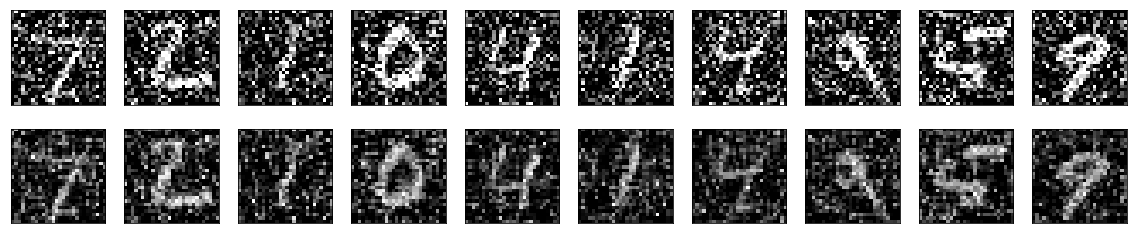

In [18]:
encoder = Model(input_img, encoded)
encoder.summary()

encoded_input = Input(shape=(7,7, 32)) 
decoded_out = autoencoder.layers[-5](encoded_input)
decoded_out = autoencoder.layers[-4](decoded_out)
decoded_out = autoencoder.layers[-3](decoded_out)
decoded_out = autoencoder.layers[-2](decoded_out)
decoded_out = autoencoder.layers[-1](decoded_out)

decoder = Model(encoded_input, decoded_out)
decoder.summary()


encoded_imgs = encoder.predict(x_test_noisy )
decoded_imgs = decoder.predict(encoded_imgs)

plotImages(x_test_noisy, decoded_imgs)